# 🧪 Actividad Evaluada: Árboles de Decisión en el Dataset Titanic

📚 **Curso:** Machine Learning

## 📝 Instrucciones
- Este notebook debe ser completado individualmente y subido a la plataforma del curso.
- Responde todas las celdas marcadas como código y asegúrate de que el notebook se ejecute sin errores.
- Puedes usar material del curso y documentación oficial de Python y Scikit-learn.

## 📄 Descripción del Dataset
El dataset **Titanic** contiene información sobre los pasajeros del famoso barco Titanic que naufragó en 1912. El objetivo es predecir si un pasajero sobrevivió o no (`Survived` = 1 si sobrevivió, 0 si no), a partir de variables como edad, clase, sexo, y punto de embarque.

Este conjunto de datos es ampliamente utilizado en aprendizaje automático como un primer ejemplo de clasificación supervisada.

---

# 🌊 Actividad Evaluada: Árboles de Decisión con el Dataset Titanic

En esta actividad aplicarás un modelo de árboles de decisión sobre el dataset Titanic.

### 🎯 Objetivos:
- Cargar y explorar el dataset
- Preprocesar las variables categóricas con One Hot Encoding
- Entrenar un árbol de decisión
- Visualizar el árbol
- Evaluar el desempeño del modelo

🕐 Tiempo estimado: 60 a 90 minutos

In [ ]:
# 📥 Cargar el dataset desde la URL de Kaggle (alternativamente cargar localmente)
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
df.head()

## 🔍 1. Exploración inicial del dataset

Antes de comenzar a entrenar modelos de Machine Learning, es fundamental **comprender la estructura y el contenido del conjunto de datos**. En esta sección, deberás realizar una exploración básica del dataset Titanic para identificar:

- Las columnas disponibles y sus tipos de datos (`.info()`)
- Las estadísticas descriptivas de las variables numéricas (`.describe()`)
- La existencia de valores faltantes (`.isnull().sum()`)

Estas acciones te permitirán decidir qué pasos de limpieza y preprocesamiento son necesarios. **Recuerda comentar brevemente tus observaciones** al final de esta sección, por ejemplo: si hay columnas con muchos datos faltantes, si hay outliers o si ciertas variables parecen poco informativas.

In [7]:
# Importar las librerías
import pandas as pd

# Cargar el dataset de Titanic desde la URL otorgada para la tarea
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

# Mostrar información general del dataset y variables númericas
print("\nInformación del dataset:")
print(df.info())
print("\nEstadísticas descriptivas:")
print(df.describe())

# Mostrar la cantidad de valores nulos por columna
print("\nValores nulos por columna:")
print(df.isnull().sum())



Primeras filas del dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450 

## 🧹 2. Preprocesamiento

Antes de entrenar un modelo de Machine Learning, es necesario **preparar adecuadamente los datos**. Este proceso se conoce como *preprocesamiento* y consiste en dejar el conjunto de datos en un formato que los algoritmos puedan utilizar de manera efectiva.

### Pasos a seguir:

1. **Eliminar columnas innecesarias**: Algunas columnas como `PassengerId`, `Name`, `Ticket` o `Cabin` no aportan información útil al modelo o contienen datos difíciles de procesar automáticamente (como texto libre o demasiados valores únicos).

2. **Manejo de valores faltantes**:
   - La columna `Age` tiene valores faltantes que puedes reemplazar por la **mediana**, ya que es menos sensible a valores extremos.
   - La columna `Embarked` tiene pocos valores faltantes, así que puedes usar la **moda** (valor más frecuente) para completarlos.

3. **Codificación de variables categóricas**:
   - Los algoritmos no pueden trabajar directamente con texto. Por eso, aplicamos **One Hot Encoding** a las variables categóricas como `Sex` y `Embarked`, transformándolas en columnas binarias (0 y 1).
   - Usar `drop_first=True` evita multicolinealidad y reduce la cantidad de columnas.

> ⚠️ **Importante:** El preprocesamiento tiene un gran impacto en la calidad del modelo. Un paso mal hecho puede afectar seriamente el desempeño del algoritmo.

Al finalizar esta etapa, deberías tener un dataset **limpio, sin valores nulos y completamente numérico**.

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# 1. Quitar columnas no útiles
df_proc = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# 2. Rellenar valores faltantes:
imp_age = SimpleImputer(strategy='median')
df_proc['Age'] = imp_age.fit_transform(df_proc[['Age']])[:, 0]

imp_emb = SimpleImputer(strategy='most_frequent')
df_proc['Embarked'] = imp_emb.fit_transform(df_proc[['Embarked']])[:, 0]

# 3. Codificar las variables Sex y Embarked con "One Hot Encoding"
ohe = OneHotEncoder(drop='first', sparse_output=False)
cat_cols = ['Sex', 'Embarked']
ohe_arr = ohe.fit_transform(df_proc[cat_cols])
ohe_df = pd.DataFrame(
    ohe_arr,
    columns=ohe.get_feature_names_out(cat_cols),
    index=df_proc.index
)

# 4. Combinar dummies con las columnas numéricas
df_final = pd.concat([df_proc.drop(columns=cat_cols), ohe_df], axis=1)

# 5. Comprobar que no haya nulos y listar columnas finales para usarlas en el árbol
print("Nulos tras preprocesamiento:\n", df_final.isnull().sum())
print("\nColumnas finales:", df_final.columns.tolist())


Nulos tras preprocesamiento:
 Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

Columnas finales: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']


## 🧠 3. Entrenamiento del modelo de Árbol de Decisión

En esta etapa, construiremos un modelo predictivo utilizando un **Árbol de Decisión**, una técnica de clasificación que divide los datos en ramas sucesivas para tomar decisiones basadas en las características del conjunto de datos.

### Pasos a seguir:

1. **Separar las variables predictoras (X) y la variable objetivo (y)**.  
   En este caso, `Survived` será nuestra variable objetivo, y el resto de las columnas las usaremos como predictores.

2. **Dividir los datos en conjuntos de entrenamiento y prueba**.  
   Esto se hace para evaluar el modelo con datos que no ha visto antes. Usa `train_test_split` para crear una división, por ejemplo 70% entrenamiento y 30% prueba.

3. **Crear y entrenar el modelo con `DecisionTreeClassifier`**.  
   Puedes usar el parámetro `max_depth` para limitar la profundidad del árbol y evitar sobreajuste.

Cuando termines esta sección, tu modelo estará entrenado y listo para ser evaluado y visualizado.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Separar las características de la etiqueta (X de Y)
X = df_final.drop(columns=['Survived'])
y = df_final['Survived']

# Dividir en entrenamiento (70%) y prueba (30%) con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

# Crear el árbol de decisión (Lo he creado para que tenga una profundidad máxima de 4)
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Mostrar la profundidad y el número de nodos del árbol entrenado
print(f"Árbol entrenado. Profundidad real: {clf.get_depth()}  |  Nº de nodos: {clf.tree_.node_count}")



Árbol entrenado. Profundidad real: 4  |  Nº de nodos: 27


## 🌳 4. Visualización del árbol

Una de las grandes ventajas de los árboles de decisión es que su estructura se puede visualizar de forma intuitiva, lo que facilita la **interpretación del modelo**.

En esta sección usaremos la función `plot_tree()` de `sklearn` para graficar el árbol entrenado. En el gráfico:

- Cada **nodo interno** representa una condición de decisión sobre alguna variable.
- Cada **rama** muestra el resultado de esa decisión (verdadero o falso).
- Cada **nodo terminal** (o hoja) muestra la clase predicha y cuántas muestras llegaron a ese punto.

### Sugerencia:
Puedes ajustar los parámetros de `plot_tree()` como `feature_names`, `class_names` y `filled=True` para mejorar la legibilidad del árbol. Asegúrate de usar `plt.figure(figsize=(ancho, alto))` para que la visualización no se corte.

**Objetivo:** Entender cómo el modelo está tomando decisiones, qué variables usa y con qué prioridad.

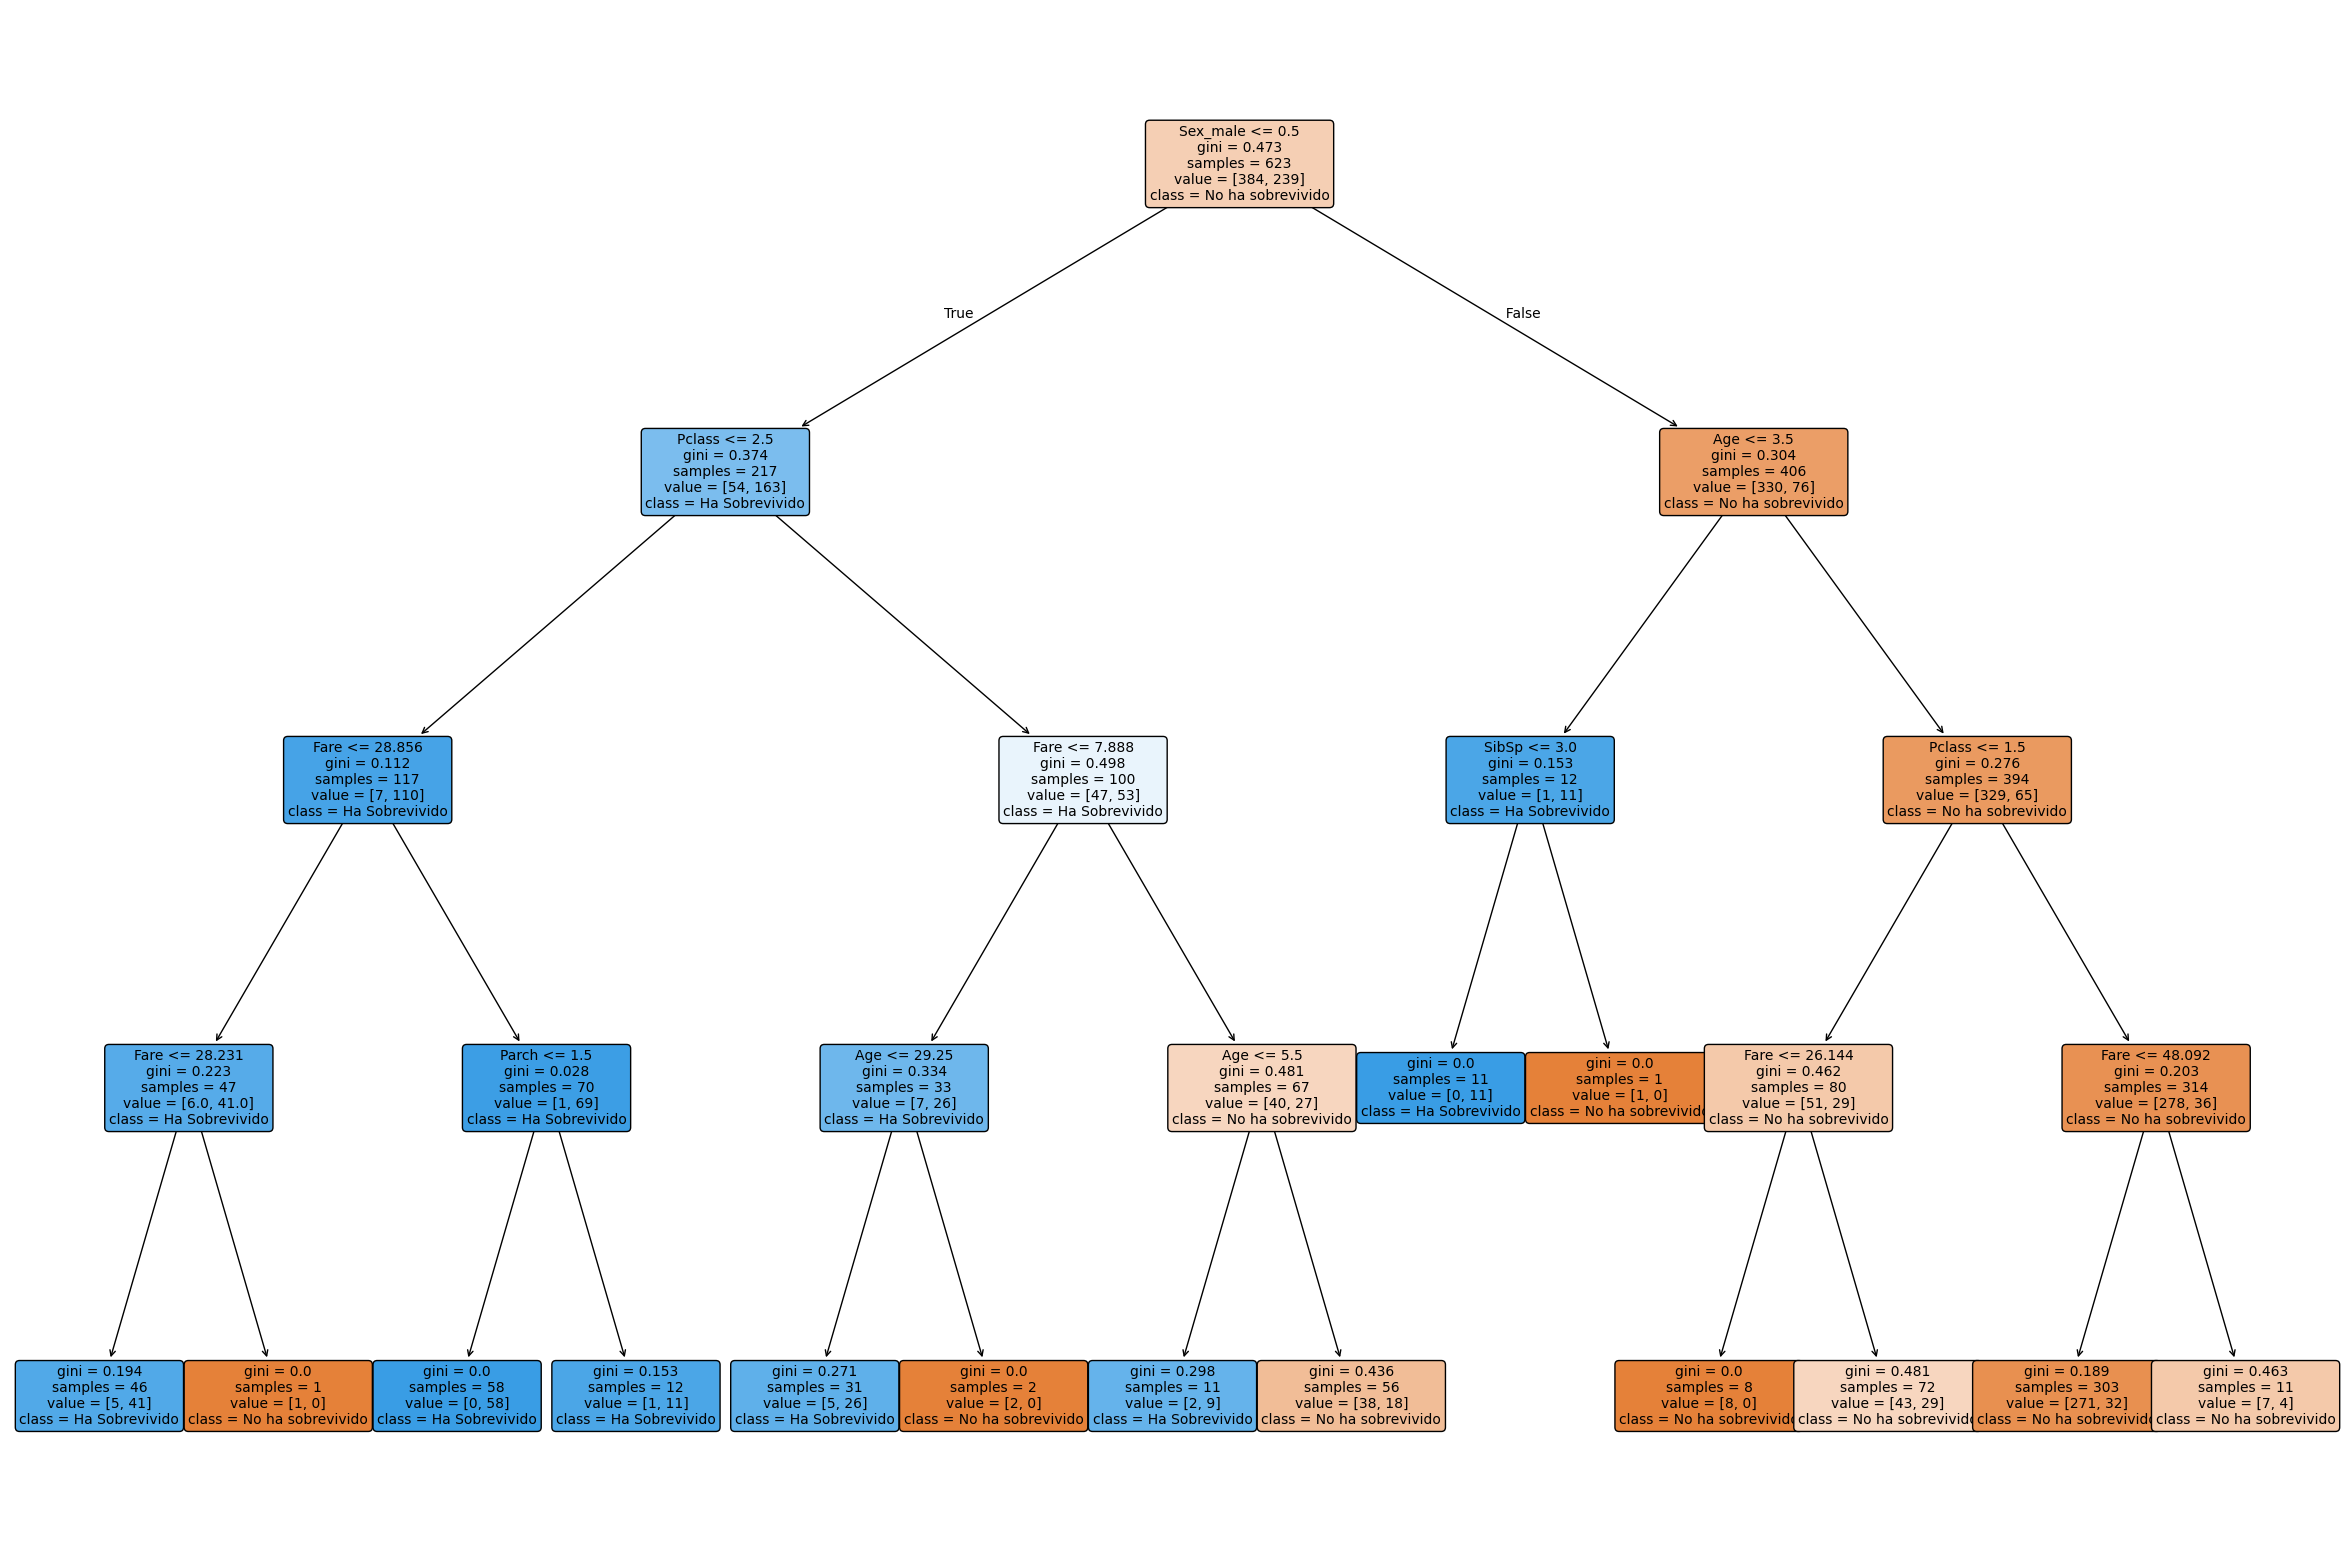

In [9]:
import matplotlib.pyplot as plt
from sklearn import tree

# De ser necesario, se pueden manipular estas entradas para cambiar el tamaño del árbol de decisión
plt.figure(figsize=(30, 20))

tree.plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['No ha sobrevivido', 'Ha Sobrevivido'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()



## 📈 5. Evaluación del modelo

Una vez entrenado el modelo, es fundamental **evaluar su desempeño** para entender qué tan bien está funcionando. En esta sección usaremos datos de prueba (no vistos por el modelo durante el entrenamiento) para calcular métricas que nos ayuden a juzgar la calidad de las predicciones.

### Métricas que utilizaremos:

- **Matriz de confusión (`confusion_matrix`)**: muestra la cantidad de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos. Es útil para entender errores específicos del modelo.
- **Reporte de clasificación (`classification_report`)**: incluye precisión (*precision*), exhaustividad (*recall*), y la métrica F1 para cada clase.
- **Exactitud (`accuracy_score`)**: indica qué porcentaje total de predicciones fue correcto.

Estas métricas te permitirán **identificar si el modelo está desbalanceado**, si tiende a predecir más una clase que otra, y si necesita ajustes en parámetros o preprocesamiento.

> 💡 Recuerda: un modelo con buena precisión pero bajo *recall* puede ser problemático si nos interesa no dejar pasar casos positivos (como sobrevivientes).

In [11]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Mostrar la matriz de confusión
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Mostrar métricas de precisión, recall y F1 para cada clase
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=['No ha sobrevivido', 'Ha Sobrevivido']))

# Cálculo de accurancy
acc = accuracy_score(y_test, y_pred)
print(f"\nExactitud (accuracy): {acc:.4f}")


Matriz de confusión:
[[156   9]
 [ 45  58]]

Reporte de clasificación:
                   precision    recall  f1-score   support

No ha sobrevivido       0.78      0.95      0.85       165
   Ha Sobrevivido       0.87      0.56      0.68       103

         accuracy                           0.80       268
        macro avg       0.82      0.75      0.77       268
     weighted avg       0.81      0.80      0.79       268


Exactitud (accuracy): 0.7985


---
## 🤔 Preguntas de Reflexión

Responde brevemente las siguientes preguntas al final de tu actividad. Puedes escribir tus respuestas directamente bajo cada pregunta:

1. ¿Qué variables crees que fueron más importantes para predecir la supervivencia? ¿Por qué?

2. ¿Qué limitaciones puede tener un árbol de decisión si no se controla su profundidad?

3. ¿Qué diferencias habría si usáramos codificación ordinal en lugar de One Hot Encoding?

4. ¿Qué cambiarías en el preprocesamiento o configuración del modelo para mejorar los resultados?

5. ¿Crees que este modelo se puede usar directamente en un entorno real? ¿Qué consideraciones éticas o técnicas deberías tener?


**1. ¿Qué variables crees que fueron más importantes para predecir la supervivencia? ¿Por qué?**

In [ ]:
# El modelo considera Sex_male como la variable más importante debido a la regla de “mujeres y niños primero”; a continuación la variable Pclass refleja la posición socioeconómica y el acceso a los botes salvavidas;
# Age captura las prioridades de embarque según la edad (niños y mayores primero); y Fare, aunque correlacionada con la clase, aporta un matiz extra sobre la ubicación exacta en el barco y el nivel socioeconómico
# dentro de cada clase.


**2. ¿Qué limitaciones puede tener un árbol de decisión si no se controla su profundidad?**

In [ ]:
# Un árbol sin restricción de profundidad puede sobreajustar al captar el ruido del conjunto de entrenamiento, mostrar una alta varianza ante ligeros cambios en los datos y
# volverse menos interpretable por el exceso de ramas y nodos.



**3. ¿Qué diferencias habría si usáramos codificación ordinal en lugar de One Hot Encoding?**

In [ ]:
# Con codificación ordinal se asignan valores secuenciales que sugieren jerarquías inexistentes (p.ej. C=0, Q=1, S=2), generan distancias numéricas engañosas entre categorías y,
# aunque reducen el número de columnas, introducen relaciones artificiales que pueden sesgar el modelo.




**4. ¿Qué cambiarías en el preprocesamiento o configuración del modelo para mejorar los resultados?**

In [ ]:
# Aplicaría ingeniería de características (p.ej. FamilySize = SibSp + Parch + 1, flag IsAlone), usaría imputación avanzada para Age (regresión o KNN en lugar de la mediana),
# ajustaría hiperparámetros (max_depth, min_samples_split, min_samples_leaf con GridSearchCV), e incorporaría poda post-entrenamiento para controlar el sobreajuste y, en caso de desbalance de clases,
# emplearía class_weight='balanced' o técnicas de sobremuestreo/submuestreo.



**5. ¿Crees que este modelo se puede usar directamente en un entorno real? ¿Qué consideraciones éticas o técnicas deberías tener?**

In [ ]:
# No es apto para producción sin ajustes: éticamente reproduce sesgos históricos (sexo, clase, edad) y puede perpetuar desigualdades; técnicamente requiere reentrenar con datos actuales para evitar data drift (para
# contextualizar el data dritf es el fenómeno por el cual la distribución de las variables de entrada cambia con el tiempo respecto),
# establecer pipelines de monitoreo y mantenimiento continuo, y garantizar cumplimiento de privacidad y normativas (p. ej. GDPR).

